In [9]:
%matplotlib inline

import os
import pandas as pd
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
import pylab 
import scipy.stats as stats
import itertools
import math
from statsmodels.stats import power
os.chdir("saved_experiments/exp2")

OSError: [Errno 2] No such file or directory: 'saved_experiments/exp2'

In [97]:
def load_file(start_index, end_index):
    df_list = []
    for i in range(start_index, end_index+1):
        name_of_file = "exp"+str(i)+".txt"
        column_name = "overhead"+str(i)
        df_temp = pd.read_csv(name_of_file)["overhead"].to_frame()
        df_temp.columns.values[0] = column_name
        df_list.append(df_temp)
    df = pd.concat(df_list, axis=1)
    df.to_csv(path_or_buf="combined.csv", index= False)
    del df_list
    
    return df
df = load_file(1, 20)

In [98]:
df.head()

,overhead1,overhead2,overhead3,overhead4,overhead5,overhead6,overhead7,overhead8,overhead9,overhead10,overhead11,overhead12,overhead13,overhead14,overhead15,overhead16,overhead17,overhead18,overhead19,overhead20
0,1.116105,1.317157,1.085769,1.364812,1.738965,2.920418,2.374297,1.546239,1.328327,1.362107,1.318627,1.708943,1.792101,1.881852,1.070797,1.057177,1.732012,1.838249,3.212796,1.989529
1,2.451637,1.098438,1.709934,1.737031,2.676348,20.845727,3.515006,10.940517,1.743957,1.648085,1.191685,1.215385,1.867267,1.632623,1.482377,1.578190,2.167826,1.491836,1.552864,4.174082
2,1.166214,1.391075,2.768546,1.779475,2.319726,1.219711,1.615442,2.199299,2.922033,1.177213,1.631094,1.063234,1.307185,1.060034,1.835251,2.009393,2.358340,2.310966,2.165055,1.465296
3,1.741435,3.422778,3.402003,1.582478,2.163721,2.096769,1.734490,1.887822,1.888782,1.158061,1.699232,2.102800,1.594754,3.808977,1.541866,2.075771,1.755907,1.652802,2.485994,1.276424
4,1.429547,3.190289,2.572166,1.524681,1.046095,4.336125,1.566907,1.577584,4.471189,2.460398,1.492394,1.091932,1.661053,1.757304,1.702269,1.208519,1.000000,2.521701,1.272939,1.716046


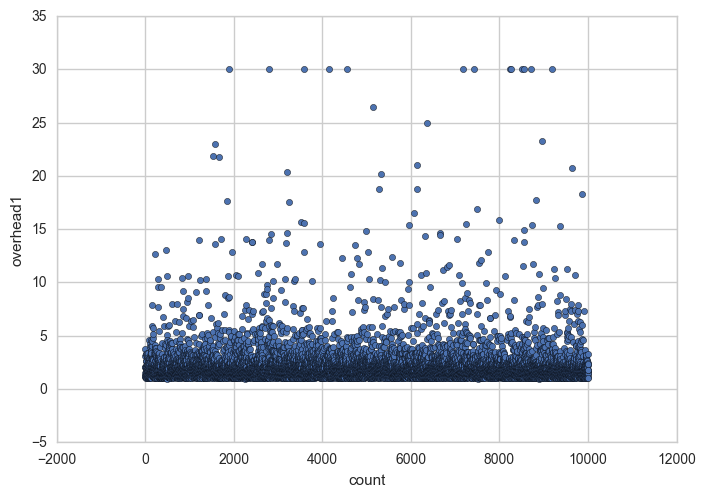

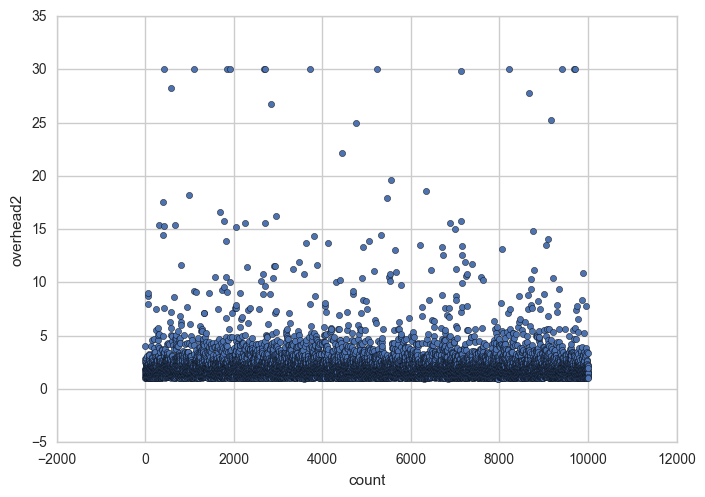

In [8]:
df.plot(kind='scatter',x='count',y='overhead1')
df.plot(kind='scatter',x='count',y='overhead2')

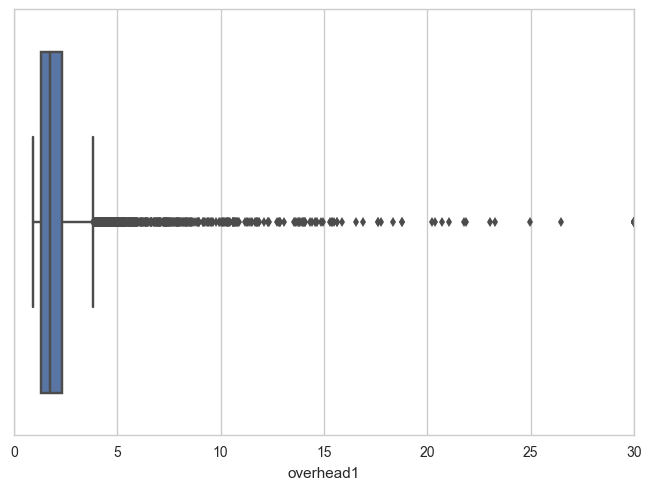

In [8]:
ax = sns.boxplot(x="overhead1", data= df)

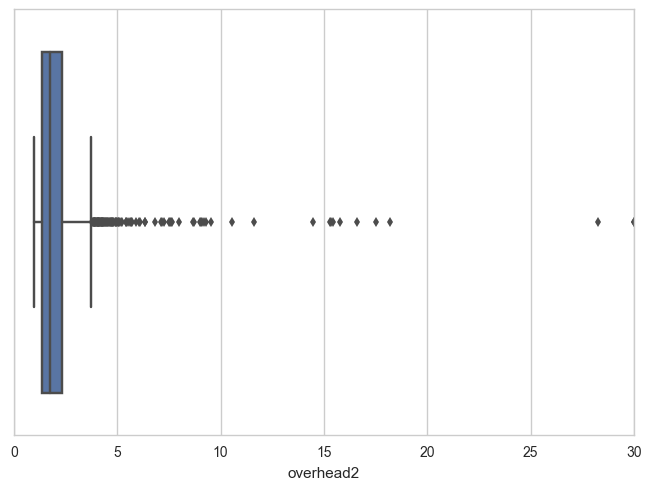

In [9]:
ax = sns.boxplot(x="overhead2", data= df)

### Analysis of Distribution of Overhead Data
Distribution of `log(data)` and `gamma` distribution seems quite similar 

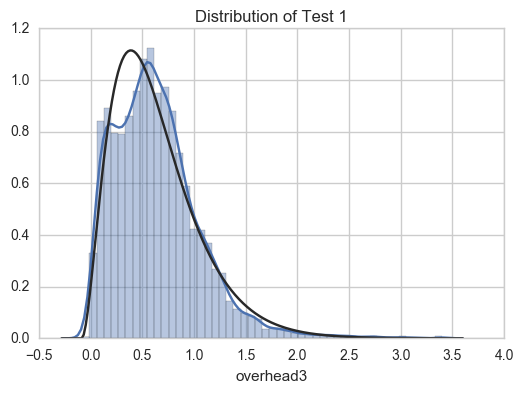

In [85]:
data = df["overhead3"]
ax = plt.axes()
sns.distplot(np.log(data), fit=stats.gamma , ax=ax)
title = "Distribution of Test 1"
ax.set_title(title)
plt.savefig(title+'.png')

2.91593202303 -0.0866541961484 0.247645688069


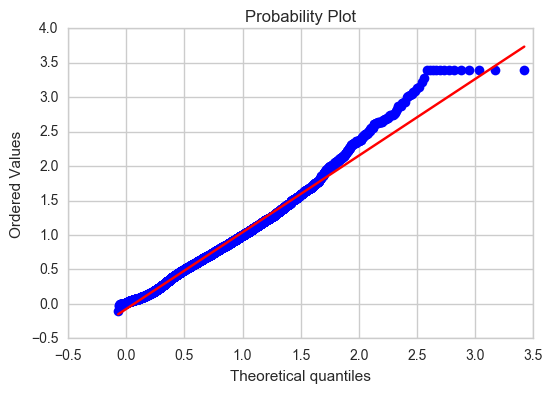

In [86]:
fit_alpha, fit_loc, fit_beta=stats.gamma.fit(np.log(data))
print fit_alpha, fit_loc, fit_beta
column_to_test = "overhead1"
stats.probplot(np.log(df[column_to_test]), dist=stats.gamma,sparams=(fit_alpha, fit_loc, fit_beta), plot=plt)
plt.savefig('Q-Qplot for '+column_to_test)

It is clear to say that data is not normally distributed since it is only positive and really skewed 

((array([-3.81060943, -3.58545756, -3.46184782, ...,  3.46184782,
          3.58545756,  3.81060943]),
  array([  0.9721357 ,   0.98107909,   0.98210666, ...,  30.        ,
          30.        ,  30.        ])),
 (1.1847096874463563, 2.131390998235827, 0.65865765416366429))

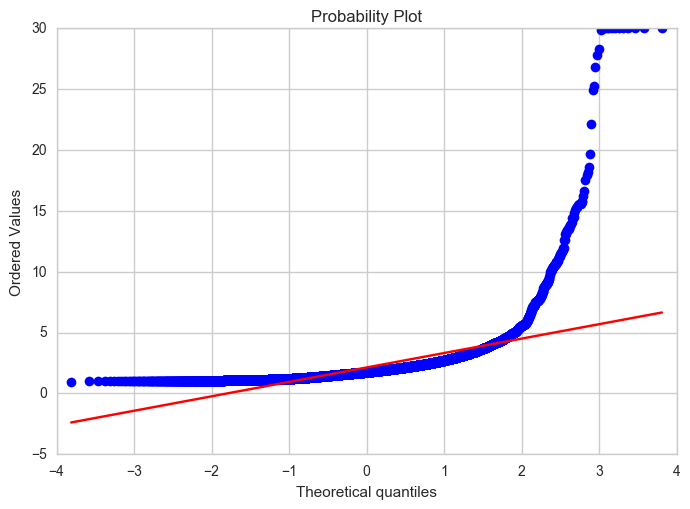

In [10]:
stats.probplot(df["overhead2"], dist="norm", plot=plt)

## Plot of P-values between each experiment

Ttest between  overhead1 and overhead2 : 9.47609794823e-05
Ttest between  overhead1 and overhead3 : 5.79878954067e-13
Ttest between  overhead1 and overhead4 : 3.08897632073e-21
Ttest between  overhead1 and overhead5 : 6.34135955215e-17
Ttest between  overhead1 and overhead6 : 1.01278255985e-18
Ttest between  overhead1 and overhead7 : 3.05840814764e-15
Ttest between  overhead1 and overhead8 : 9.44306942077e-14
Ttest between  overhead1 and overhead9 : 1.68967930039e-10
Ttest between  overhead1 and overhead10 : 2.41877335323e-14
Ttest between  overhead1 and overhead11 : 4.11414068218e-11
Ttest between  overhead1 and overhead12 : 2.77493453047e-16
Ttest between  overhead1 and overhead13 : 4.46490752231e-26
Ttest between  overhead1 and overhead14 : 2.92184725608e-15
Ttest between  overhead1 and overhead15 : 2.89845947288e-34
Ttest between  overhead1 and overhead16 : 1.52143278104e-22
Ttest between  overhead1 and overhead17 : 1.7451366251e-34
Ttest between  overhead1 and overhead18 : 3.12384

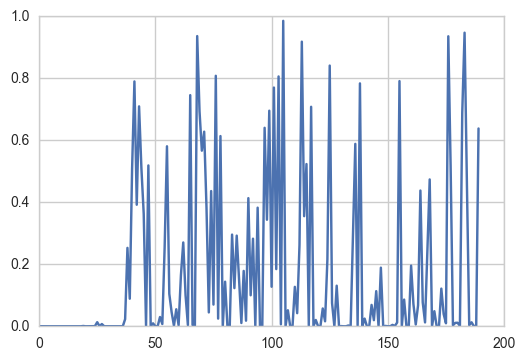

In [100]:
p_values = []
for c1, c2  in itertools.combinations(df.columns.values,2):
    x1 = np.asarray(df[c1])
    x2 = np.asarray(df[c2])
    p_value = stats.ttest_ind(x1,x2)[1]
    p_values.append( p_value)
    print "Ttest between ", c1, 'and', c2 ,':',p_value
    #print "Variance of", c1, ": ",np.var(x1),"--" ,c2 ,": ", np.var(x2)
    #print "Mean of    ", c1, ": ",np.mean(x1),"--" ,c2 ,": ", np.mean(x2)
plt.plot(p_values)